In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#Use "-1" for CPU-only devices

#If working on GPU enviroment
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#Limit the memory allocated by tensorflow to only the necessary amount

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTHONHASHSEED'] = '2'

In [2]:
import numpy as np
from numpy.random import seed
seed(18)

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.random import set_seed
from tensorflow.keras.utils import set_random_seed
set_seed(18)
set_random_seed(18)

import keras

import matplotlib.pyplot as plt

from Supporting_func_file import *

Version_check()

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


All packages are using the targeted versions.


## CCD camera

### Loading the CCD data

In [3]:
file_path_CCD = "Data_sets/USAF_test/USAF_test_CCD.npz"

#The polarization states reconstructed using the CCD camera and polarization tomography
CCD_states_rho, CCD_states_bloch = Load_data_file(file_path_CCD)
#CCD_states_rho contains polarization matrix for each pixel
#CCD_states_bloch contains Bloch array for each pixel

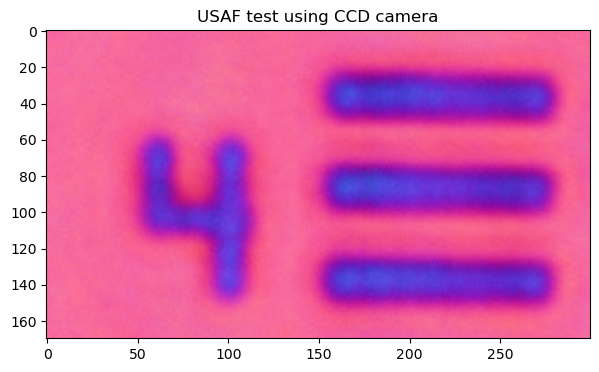

In [4]:
CCD_states_bloch_renorm = (CCD_states_bloch + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(8,4))
plt.imshow(CCD_states_bloch_renorm)
plt.title("USAF test using CCD camera")
plt.show()

### Cropping the background region

In [5]:
#Specifying the cropping region
CCD_horizontal_positions_BG = [20, 80]
CCD_vertical_positions_BG = [20, 50]

In [6]:
#Cropping out the region
CCD_states_bloch_BG = CCD_states_bloch[CCD_vertical_positions_BG[0]:CCD_vertical_positions_BG[1], CCD_horizontal_positions_BG[0]:CCD_horizontal_positions_BG[1]]
#Bloch parameters of the background region

CCD_states_rho_BG = CCD_states_rho[CCD_vertical_positions_BG[0]:CCD_vertical_positions_BG[1], CCD_horizontal_positions_BG[0]:CCD_horizontal_positions_BG[1]]
#Polarization matrices of the background region

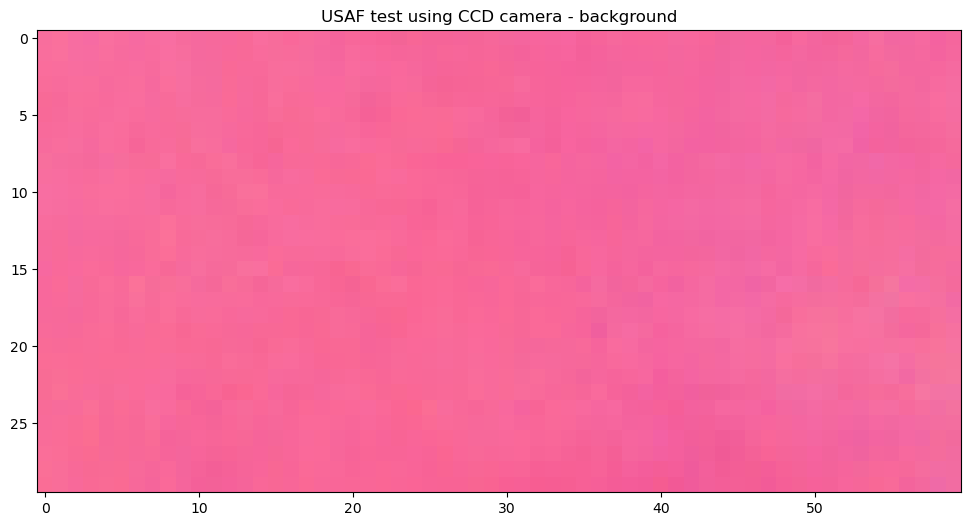

In [7]:
#Visualization of the Block parameters in the background region
CCD_states_bloch_BG_renorm = (CCD_states_bloch_BG + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(12,6))
plt.imshow(CCD_states_bloch_BG_renorm)
plt.title("USAF test using CCD camera - background")
plt.show()

In [8]:
#Averaging the polarization matrices to get single background polarization state representative
CCD_states_rho_BG_representative = np.average(CCD_states_rho_BG, axis=(0,1))

### Cropping the polarization-active region

In [9]:
#Specifying the cropping region
CCD_horizontal_positions_PA = [180, 270]
CCD_vertical_positions_PA = [32, 41]

In [10]:
#Cropping out the region
CCD_states_bloch_PA = CCD_states_bloch[CCD_vertical_positions_PA[0]:CCD_vertical_positions_PA[1], CCD_horizontal_positions_PA[0]:CCD_horizontal_positions_PA[1]]
#Bloch parameters of the polarization-active region

CCD_states_rho_PA = CCD_states_rho[CCD_vertical_positions_PA[0]:CCD_vertical_positions_PA[1], CCD_horizontal_positions_PA[0]:CCD_horizontal_positions_PA[1]]
#Polarization matrices of the polarization-active region

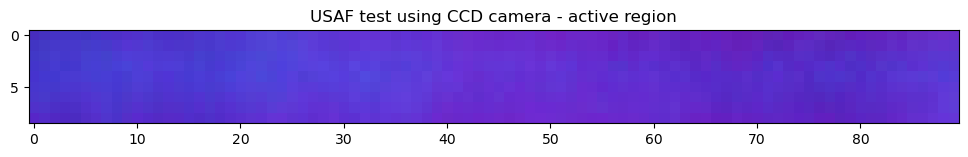

In [11]:
#Visualization of the Block parameters in the polarization-active region
CCD_states_bloch_PA_renorm = (CCD_states_bloch_PA + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(12,6))
plt.imshow(CCD_states_bloch_PA_renorm)
plt.title("USAF test using CCD camera - active region")
plt.show()

In [12]:
#Averaging the polarization matrices to get single USAF-affected polarization state representative
CCD_states_rho_PA_representative = np.average(CCD_states_rho_PA, axis=(0,1))

## All-fiber sensor (AFS)

### Loading the sensor data

In [13]:
file_path_AFS = "Data_sets/USAF_test/USAF_test_Sensor.npz"

#The polarization states reconstructed using the CCD camera and polarization tomography
AFS_states_rho, AFS_states_bloch = Load_data_file(file_path_AFS)
#AFS_states_rho contains polarization matrix for each pixel
#AFS_states_bloch contains Bloch array for each pixel

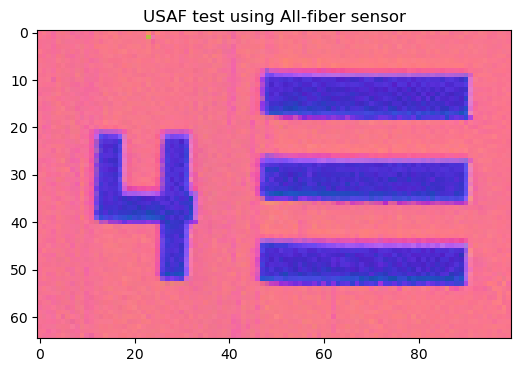

In [14]:
AFS_states_bloch_renorm = (AFS_states_bloch + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(8,4))
plt.imshow(AFS_states_bloch_renorm)
plt.title("USAF test using All-fiber sensor")
plt.show()

### Cropping the background region

In [15]:
#Specifying the cropping region
AFS_horizontal_positions_BG = [60, 85]
AFS_vertical_positions_BG = [55, 60]

In [16]:
#Cropping out the polarization-active (PA) region
AFS_states_bloch_BG = AFS_states_bloch[AFS_vertical_positions_BG[0]:AFS_vertical_positions_BG[1], AFS_horizontal_positions_BG[0]:AFS_horizontal_positions_BG[1]]
#Bloch parameters of the polarization-active region

AFS_states_rho_BG = AFS_states_rho[AFS_vertical_positions_BG[0]:AFS_vertical_positions_BG[1], AFS_horizontal_positions_BG[0]:AFS_horizontal_positions_BG[1]]
#Polarization matrices of the polarization-active region

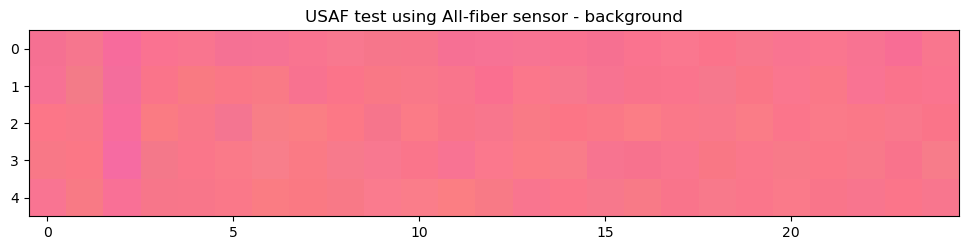

In [17]:
#Visualization of the Block parameters in the background region
AFS_states_bloch_BG_renorm = (AFS_states_bloch_BG + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(12,6))
plt.imshow(AFS_states_bloch_BG_renorm)
plt.title("USAF test using All-fiber sensor - background")
plt.show()

In [18]:
#Averaging the polarization matrices to get single background polarization state representative
AFS_states_rho_BG_representative = np.average(AFS_states_rho_BG, axis=(0,1))

### Cropping the polarization-active region

In [19]:
#Specifying the cropping region
AFS_horizontal_positions_PA = [49, 91]
AFS_vertical_positions_PA = [10, 18]

In [20]:
#Cropping out the polarization-active (PA) region
AFS_states_bloch_PA = AFS_states_bloch[AFS_vertical_positions_PA[0]:AFS_vertical_positions_PA[1], AFS_horizontal_positions_PA[0]:AFS_horizontal_positions_PA[1]]
#Bloch parameters of the polarization-active region

AFS_states_rho_PA = AFS_states_rho[AFS_vertical_positions_PA[0]:AFS_vertical_positions_PA[1], AFS_horizontal_positions_PA[0]:AFS_horizontal_positions_PA[1]]
#Polarization matrices of the polarization-active region

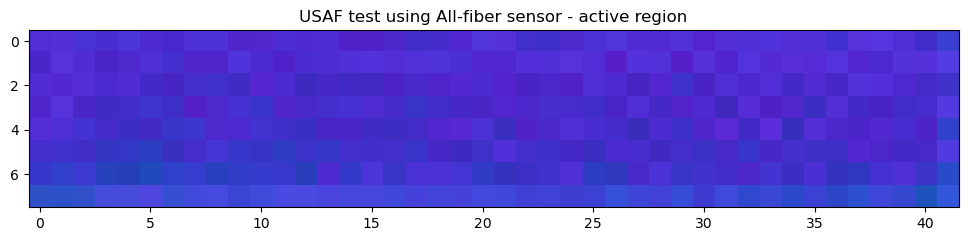

In [21]:
#Visualization of the Block parameters in the background region
AFS_states_bloch_PA_renorm = (AFS_states_bloch_PA + 1) / 2
#Renormalization to (0,1) range for visualization using plt.imshow

plt.figure(figsize=(12,6))
plt.imshow(AFS_states_bloch_PA_renorm)
plt.title("USAF test using All-fiber sensor - active region")
plt.show()

In [22]:
#Averaging the polarization matrices to get single polarization-active region representative
AFS_states_rho_PA_representative = np.average(AFS_states_rho_PA, axis=(0,1))

## Polarization state comparison

In [23]:
#Evaluating fidelity between the background region representatives
fidelity_BG = Fidelity(CCD_states_rho_BG_representative,AFS_states_rho_BG_representative)
print("Fidelity between the background region representatives:          ", fidelity_BG.round(5))

#Evaluating fidelity between the polarization-active region representatives
fidelity_PA = Fidelity(CCD_states_rho_PA_representative,AFS_states_rho_PA_representative)
print("Fidelity between the polarization-active region representatives: ", fidelity_PA.round(5))

#Averaging those fidelities
fidelity = np.average([Fidelity(CCD_states_rho_BG_representative,AFS_states_rho_BG_representative), Fidelity(CCD_states_rho_PA_representative,AFS_states_rho_PA_representative)])
print("Averaged fidelity between the CCD camera and all-fiber sensor:   ", fidelity.round(5))

Fidelity between the background region representatives:           0.99162
Fidelity between the polarization-active region representatives:  0.98329
Averaged fidelity between the CCD camera and all-fiber sensor:    0.98745


## All-fiber sensor resolution

In [24]:
#Arbitrarily choosing several vertical lines for resolution estimation
vertical_slices = np.array([AFS_states_bloch[3:18,55], 
                            AFS_states_bloch[11:26,55], 
                            AFS_states_bloch[3:18,65], 
                            AFS_states_bloch[11:26,65], 
                            AFS_states_bloch[3:18,75], 
                            AFS_states_bloch[11:26,75], 
                            AFS_states_bloch[3:18,85], 
                            AFS_states_bloch[11:26,85]])

#Arbitrarily choosing several horizontal lines for resolution estimation
horizontal_slices = np.array([AFS_states_bloch[10,40:60], 
                              AFS_states_bloch[10,80:100], 
                              AFS_states_bloch[12,40:60], 
                              AFS_states_bloch[12,80:100], 
                              AFS_states_bloch[14,40:60], 
                              AFS_states_bloch[14,80:100], 
                              AFS_states_bloch[16,40:60], 
                              AFS_states_bloch[16,80:100]])

In [25]:
#Preparing the intensity ranges for fitation
VS_grayscaled = np.average((vertical_slices+1)/2, axis=-1)
VS_subbed = VS_grayscaled - VS_grayscaled.min(axis=-1)[:,None]
VS_renormalized = VS_subbed / VS_subbed.max(axis=-1)[:,None]

HS_grayscaled = np.average((horizontal_slices+1)/2, axis=-1)
HS_subbed = HS_grayscaled - HS_grayscaled.min(axis=-1)[:,None]
HS_renormalized = HS_subbed / HS_subbed.max(axis=-1)[:,None]

Text(0.5, 1.0, 'Horizontal line - 1. out of 8')

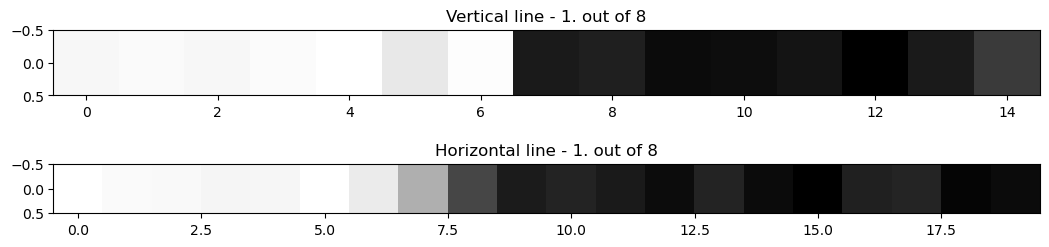

In [26]:
#Visualize two examples of the arrays to be fitted
plt.figure(figsize=(28,3))
plt.subplot(221)
plt.imshow(VS_renormalized[0][None,:], cmap='gray')
plt.title("Vertical line - 1. out of 8")

plt.subplot(223)
plt.imshow(HS_renormalized[0][None,:], cmap='gray')
plt.title("Horizontal line - 1. out of 8")

In [27]:
pixel_size = 0.01
#The pixels in the scan image are 0.01 mm apart, i.e., scanning step is 0.01 mm

resolution_array = np.zeros([int(VS_renormalized.shape[0] + HS_renormalized.shape[0])])
parameters_array = np.zeros([resolution_array.shape[0], 4])
for i in range(VS_renormalized.shape[0]):
    resolution_array[i], parameters_array[i] = Calculate_resolution(VS_renormalized[i], pixel_size)
for j in range(HS_renormalized.shape[0]):
    resolution_array[i+j+1], parameters_array[i+j+1] = Calculate_resolution(HS_renormalized[j], pixel_size)

print("The resolution is estimated to be", resolution_array.mean().round(5), "+-", resolution_array.std().round(5), "mm")
print("which corresponds to", int(resolution_array.mean().round(3)*1e3), "+-", int(resolution_array.std().round(3)*1e3), "µm")

The resolution is estimated to be 0.00638 +- 0.00586 mm
which corresponds to 6 +- 6 µm
